In [61]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [62]:
df_dk = pd.read_excel("https://www.postnord.dk/globalassets/danmark/.excel-docs/postnummerfil-til-download-12-18.xlsx",sheet_name=0, skiprows=range(1), skipfooter=0)


In [63]:
# let's drop something we don't need

#df_dk.drop(['2'], axis=0, inplace=True)
df_dk.columns.values 
df_dk.index.values
print(type(df_dk.columns))
print(type(df_dk.index))

#To get the index and columns as lists, we can use the tolist() method.
df_dk.columns.tolist()
df_dk.index.tolist()

print (type(df_dk.columns.tolist()))
print (type(df_dk.index.tolist()))

# size of dataframe (rows, columns)
df_dk.shape  


<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>
<class 'list'>
<class 'list'>


(1453, 6)

In [64]:
df_dk.drop(['Firma'], axis=1, inplace=True)
df_dk.drop(['Land'], axis=1, inplace=True)
df_dk.drop(['Provins'], axis=1, inplace=True)

In [65]:
df_dk.tail(800)

,Postnr.,Bynavn,Gade
653,1965,Frederiksberg C,Erik Menveds Vej
654,1966,Frederiksberg C,Steenwinkelsvej
655,1967,Frederiksberg C,Svanemosegårdsvej
656,1970,Frederiksberg C,Rosenørns Alle 1-67 og 22-70
657,1971,Frederiksberg C,Adolph Steens Alle
658,1972,Frederiksberg C,Worsaaesvej
659,1973,Frederiksberg C,Jakob Dannefærds Vej
660,1974,Frederiksberg C,Julius Thomsens Gade ulige nr.
661,2000,Frederiksberg,NaN
662,2100,København Ø,NaN


In [66]:
df_dk.rename(columns={'Postnr.':'Postalcode', 'Bynavn':'Borough', 'Gade':'Street'}, inplace=True)
#df_dk.head(25)

In [67]:
# Get indexes for which there is a "Postboks" column Borough 
indexStreet = df_dk[df_dk['Street'] == 'Postboks' ].index
# Delete "Postboks" Streets
df_dk.drop(indexStreet, inplace=True)

#and remove a lot of data we don't care of
indexStreet = df_dk[df_dk['Street'] == 'Ufrankerede svarforsendelser' ].index
df_dk.drop(indexStreet, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']>=3000].index
df_dk.drop(indexPostcode, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']<1000].index
df_dk.drop(indexPostcode, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']==2412].index
df_dk.drop(indexPostcode, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']==1512].index
df_dk.drop(indexPostcode, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']==1513].index
df_dk.drop(indexPostcode, inplace=True)

#df_dk = df_dk[pd.notnull(df_dk['Street'])]
#Reassignes indexes based on dataframe length
df_dk.index = pd.RangeIndex(len(df_dk.index))
df_dk.index = range(len(df_dk.index))

In [68]:
df_dk.shape


(651, 3)

In [69]:
df_dk.tail(250)

,Postalcode,Borough,Street
401,1666,København V,Matthæusgade
402,1667,København V,Frederiksstadsgade
403,1668,København V,Mysundegade
404,1669,København V,Flensborggade
405,1670,København V,Enghave Plads
406,1671,København V,Haderslevgade
407,1671,København V,Tove Ditlevsens Plads
408,1672,København V,Broagergade
409,1673,København V,Ullerupgade
410,1674,København V,Enghavevej 1-77 og 2-78


In [70]:
df_dk_final = df_dk.groupby(['Postalcode', 'Borough'], as_index=False).agg(lambda x: ', '.join(set(x.astype(str))))

In [71]:
df_dk_final.shape


(557, 3)

In [72]:
df_dk_final

,Postalcode,Borough,Street
0,1050,København K,Kongens Nytorv
1,1051,København K,Nyhavn
2,1052,København K,Herluf Trolles Gade
3,1053,København K,Cort Adelers Gade
4,1054,København K,Peder Skrams Gade
5,1055,København K,"August Bournonvilles Passage, Tordenskjoldsgade"
6,1056,København K,Heibergsgade
7,1057,København K,Holbergsgade
8,1058,København K,Havnegade
9,1059,København K,Niels Juels Gade


In [73]:
df_dk_compact = df_dk.groupby(['Borough'], as_index=False).agg(lambda x: ', '.join(set(x.astype(str))))
df_dk_compact.drop(['Street'], axis=1, inplace=True)

In [74]:
df_dk_compact.head(70)

,Borough,Postalcode
0,Albertslund,2620
1,Bagsværd,2880
2,Ballerup,2750
3,Brøndby,2605
4,Brøndby Strand,2660
5,Brønshøj,2700
6,Charlottenlund,2920
7,Dragør,2791
8,Dyssegård,2870
9,Frederiksberg,2000


In [75]:
coords={'Borough': ['Albertslund','Bagsværd','Ballerup','Brøndby','Brøndby Strand',
                    'Brønshøj','Charlottenlund','Dragør','Dyssegård','Frederiksberg',
                    'Frederiksberg C','Gentofte','Glostrup','Greve','Hedehusene',
                    'Hellerup','Herlev','Holte','Hvidovre','Hørsholm',
                    'Ishøj','Karlslunde','Kastrup','Klampenborg','Kokkedal',
                    'Kongens Lyngby','København K','København N','København NV','København S',
                    'København SV','København V','København Ø','Måløv','Nivå',
                    'Nordhavn','Nærum','Rungsted Kyst','Rødovre','Skodsborg',
                    'Skovlunde','Smørum','Solrød Strand','Søborg','Taastrup',
                    'Valby','Vallensbæk','Vallensbæk Strand','Vanløse','Vedbæk',
                    'Virum'], 
                    'Latitude':[55.680222, 55.760240, 55.733414, 55.645991, 55.622972, 
                           55.703435, 55.759298, 55.589891, 55.733663, 55.678974,
                           55.679026, 55.751258, 55.676961, 55.598277, 55.654361,   
                           55.735471, 55.732919, 55.815150, 55.639020, 55.886094,
                           55.623819, 55.569345, 55.612573, 55.779539, 55.913078, 
                           55.770674, 55.682401, 55.695291, 55.713963, 55.650364, 
                           55.648406, 55.670191, 55.708410, 55.753147, 55.932396, 
                           55.717108, 55.815655, 55.886037, 55.685475, 55.825289, 
                           55.716893, 55.729344, 55.530040, 55.737346, 55.650219, 
                           55.661883, 55.633115, 55.621965, 55.689508, 55.849819, 
                           55.790514] , 
                    'Longitude':[12.344944, 12.449665, 12.357824, 12.415682, 12.420225, 
                           12.497005, 12.575239, 12.644038, 12.527227, 12.515761,
                           12.544811, 12.543335, 12.402743, 12.243247, 12.199693,
                           12.567897, 12.424329, 12.470898, 12.470230, 12.507487,
                           12.318044, 12.224804, 12.608279, 12.589481, 12.447109,  
                           12.506234, 12.581738, 12.549556, 12.527045, 12.599138,
                           12.534407, 12.556711, 12.576592, 12.318749, 12.502298,
                           12.604248, 12.538057, 12.532459, 12.451917, 12.572454,
                           12.395941, 12.272230, 12.215349, 12.485626, 12.291574,
                           12.516543, 12.373757, 12.387388, 12.483650, 12.556583,
                           12.467500] }



lat_lng_coords_df = pd.DataFrame(coords)


In [76]:
#and we collect them in a single table
df_dk_work = pd.concat([df_dk_compact,lat_lng_coords_df.drop(['Borough'], axis=1)], axis=1, sort=False)
df_dk_work 


,Borough,Postalcode,Latitude,Longitude
0,Albertslund,2620,55.680222,12.344944
1,Bagsværd,2880,55.760240,12.449665
2,Ballerup,2750,55.733414,12.357824
3,Brøndby,2605,55.645991,12.415682
4,Brøndby Strand,2660,55.622972,12.420225
5,Brønshøj,2700,55.703435,12.497005
6,Charlottenlund,2920,55.759298,12.575239
7,Dragør,2791,55.589891,12.644038
8,Dyssegård,2870,55.733663,12.527227
9,Frederiksberg,2000,55.678974,12.515761


In [77]:
address = 'Copenhagen, DK'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinate of Copenhagen are {}, {}.'.format(latitude, longitude))

The geographical coordinate of Copenhagen are 55.6867243, 12.5700724.


In [78]:
# create map of Copenhagen Boroughs using latitude and longitude values
map_copenhagen = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, postalcode in zip(df_dk_work ['Latitude'], df_dk_work ['Longitude'], df_dk_work ['Borough'], df_dk_work['Postalcode']):
    label = '{}, {}'.format(postalcode, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_copenhagen)  
    
map_copenhagen

In [79]:
CLIENT_ID = 'UIZMT34VA14TORPYYA103Y5W1Y3WTGQ0DAPM0PLWK4A5YSVH' # your Foursquare ID
CLIENT_SECRET = 'I3ATILBEMRH3DPZ201NHV33BWINMVCK0RHGQCZX5NRBPNNWR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UIZMT34VA14TORPYYA103Y5W1Y3WTGQ0DAPM0PLWK4A5YSVH
CLIENT_SECRET:I3ATILBEMRH3DPZ201NHV33BWINMVCK0RHGQCZX5NRBPNNWR


In [80]:
#Let's explore one neighbourhood in Copenhagen (the fourth in our list)
df_dk_work.loc[6, 'Borough']

'Charlottenlund'

In [81]:
cop_borough_latitude = df_dk_work.loc[6, 'Latitude'] # neighborhood latitude value
cop_borough_longitude = df_dk_work.loc[6, 'Longitude'] # neighborhood longitude value
cop_borough_name = df_dk_work.loc[6, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(cop_borough_name, 
                                                               cop_borough_latitude, 
                                                               cop_borough_longitude))

Latitude and longitude values of Charlottenlund are 55.759298, 12.575239.


In [82]:
#Now, let's get the top 150 venues that are in Charlottenlund within a radius of 600 meters

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    cop_borough_latitude, 
    cop_borough_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=UIZMT34VA14TORPYYA103Y5W1Y3WTGQ0DAPM0PLWK4A5YSVH&client_secret=I3ATILBEMRH3DPZ201NHV33BWINMVCK0RHGQCZX5NRBPNNWR&v=20180605&ll=55.759298,12.575239&radius=1000&limit=100'

In [83]:
output = requests.get(url).json()
output

{'meta': {'code': 200, 'requestId': '5cb5d67a4c1f6726b34c6784'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Charlottenlund',
  'headerFullLocation': 'Charlottenlund, Copenhagen',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 55.76829800900001,
    'lng': 12.59120429491371},
   'sw': {'lat': 55.75029799099999, 'lng': 12.559273705086289}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4be2853b63609c744dc31bff',
       'name': 'Irma Ordrupvej',
       'location': {'address': 'Ordrupvej 79',
        'lat': 55.76212699178983,
        'lng': 12.576006984490443,
        'labeledLatLngs': [{'label': 'display',
          'lat

In [84]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [85]:
venues = output['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(50)

,name,categories,lat,lng
0,Irma Ordrupvej,Supermarket,55.762127,12.576007
1,JOE & THE JUICE,Juice Bar,55.761337,12.573765
2,Social Foods,Dessert Shop,55.764117,12.579774
3,Emmerys,Café,55.753364,12.571816
4,The Bread Station,Bakery,55.751570,12.571574
5,Meny,Supermarket,55.755020,12.567471
6,Izumi,Sushi Restaurant,55.754712,12.568735
7,Meny,Grocery Store,55.753440,12.572876
8,Paradis Is,Ice Cream Shop,55.753968,12.570234
9,Ordrup Park,Park,55.759918,12.571596


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


In [86]:
#Let's create a function to repeat the same process to all the neighborhoods in the city
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [87]:
#Let's run the above function on each neighborhood and create a new dataframe called copenhagen_venues.

copenhagen_venues = getNearbyVenues(names=df_dk_work['Borough'],
                                   latitudes=df_dk_work['Latitude'],
                                   longitudes=df_dk_work['Longitude']
                                  )

Albertslund
Bagsværd
Ballerup
Brøndby
Brøndby Strand
Brønshøj
Charlottenlund
Dragør
Dyssegård
Frederiksberg
Frederiksberg C
Gentofte
Glostrup
Greve
Hedehusene
Hellerup
Herlev
Holte
Hvidovre
Hørsholm
Ishøj
Karlslunde
Kastrup
Klampenborg
Kokkedal
Kongens Lyngby
København K
København N
København NV
København S
København SV
København V
København Ø
Måløv
Nivå
Nordhavn
Nærum
Rungsted Kyst
Rødovre
Skodsborg
Skovlunde
Smørum
Solrød Strand
Søborg
Taastrup
Valby
Vallensbæk
Vallensbæk Strand
Vanløse
Vedbæk
Virum


In [88]:
print(copenhagen_venues.shape)
copenhagen_venues.head(1333)

(1312, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albertslund,55.680222,12.344944,Badesøen,55.675682,12.334593,Water Park
1,Albertslund,55.680222,12.344944,Galgebakken Torv,55.679553,12.347632,Plaza
2,Albertslund,55.680222,12.344944,Fakta,55.675374,12.354690,Grocery Store
3,Albertslund,55.680222,12.344944,Albertslund Hallerne,55.676495,12.333289,Volleyball Court
4,Bagsværd,55.760240,12.449665,Bibliografen,55.760622,12.456612,Multiplex
5,Bagsværd,55.760240,12.449665,Irma Bagsværd Torv,55.760413,12.454644,Grocery Store
6,Bagsværd,55.760240,12.449665,Aldershvile Planteskole,55.765009,12.457966,Flower Shop
7,Bagsværd,55.760240,12.449665,Meny,55.760992,12.454781,Supermarket
8,Bagsværd,55.760240,12.449665,Netto,55.761198,12.450222,Grocery Store
9,Bagsværd,55.760240,12.449665,GuldBageren,55.761049,12.452373,Bakery


In [89]:
#let's select the restauraunts in Copenhagen only
copenhagen_restaurant = copenhagen_venues[copenhagen_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
copenhagen_restaurant.replace("Restaurant","Generic Restaurant", inplace = True) #useful for later in the folium script
copenhagen_restaurant.head(10)
#print(copenhagen_restaurant.shape)


#let's select the pizza place in Copenhagen only
#copenhagen_pizza = copenhagen_venues[copenhagen_venues['Venue Category'].str.contains('Pizza')].reset_index(drop=True)
#copenhagen_pizza.replace("Restaurant","Generic Restaurant", inplace = True) #useful for later in the folium script
#copenhagen_pizza.head(10)




,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ballerup,55.733414,12.357824,Kebabland,55.729139,12.354907,Falafel Restaurant
1,Brønshøj,55.703435,12.497005,Ya Ya Sushi,55.705431,12.492150,Sushi Restaurant
2,Brønshøj,55.703435,12.497005,Alanya 2,55.706044,12.489991,Doner Restaurant
3,Charlottenlund,55.759298,12.575239,Izumi,55.754712,12.568735,Sushi Restaurant
4,Charlottenlund,55.759298,12.575239,Sushi lovers,55.762501,12.576526,Sushi Restaurant
5,Charlottenlund,55.759298,12.575239,Café A,55.763690,12.579119,Generic Restaurant
6,Charlottenlund,55.759298,12.575239,La Sirena,55.753581,12.571227,Italian Restaurant
7,Dyssegård,55.733663,12.527227,Madhus 24,55.730362,12.521682,Generic Restaurant
8,Dyssegård,55.733663,12.527227,King Chicken,55.728764,12.524049,Fast Food Restaurant
9,Frederiksberg,55.678974,12.515761,Restaurant Frederiks have,55.679178,12.525047,French Restaurant


In [90]:
# calculating total number of restaurants per borough
copenhagen_restaurant_counts= pd.DataFrame(copenhagen_restaurant['Venue Category'].value_counts().astype(float))
copenhagen_restaurant_counts = copenhagen_restaurant_counts.reset_index()
copenhagen_restaurant_counts.columns = ['Venue Category', 'Restaurant Counts']
copenhagen_restaurant_counts.head(200)



,Venue Category,Restaurant Counts
0,Scandinavian Restaurant,32.0
1,Sushi Restaurant,27.0
2,Generic Restaurant,26.0
3,Italian Restaurant,23.0
4,Thai Restaurant,21.0
5,Fast Food Restaurant,12.0
6,Asian Restaurant,11.0
7,Indian Restaurant,10.0
8,French Restaurant,8.0
9,Falafel Restaurant,6.0


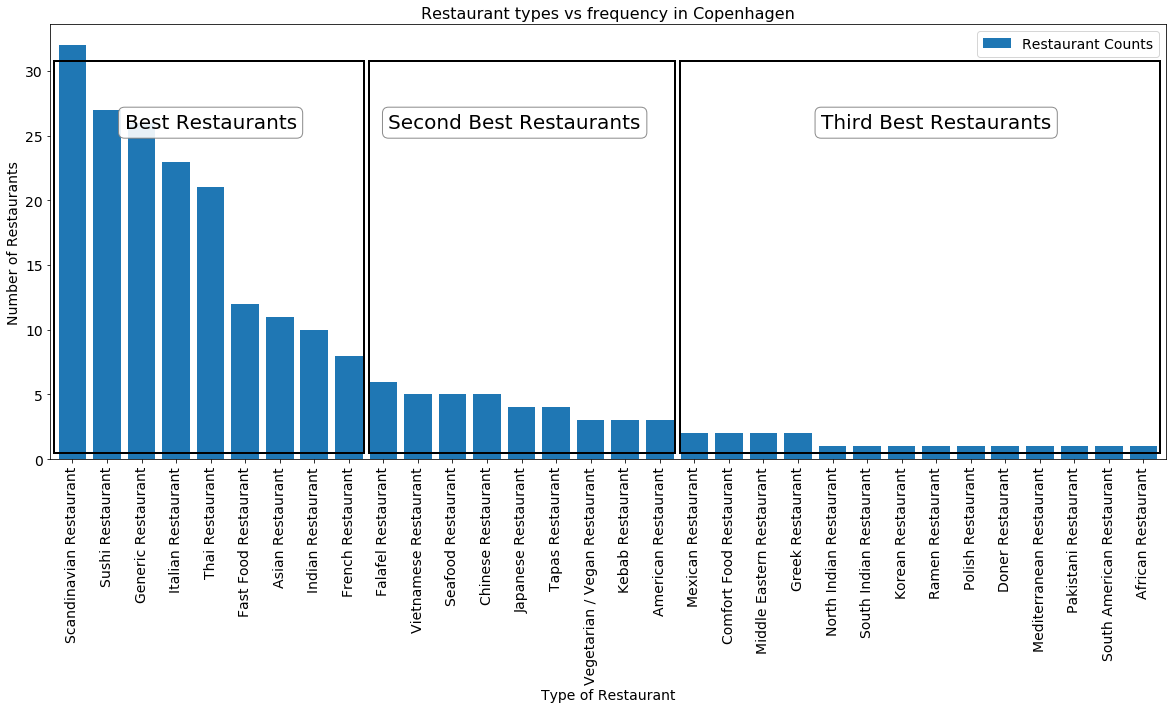

In [107]:
# Let's plot the restaurant type frequency
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
import matplotlib.patches as patches

ax = copenhagen_restaurant_counts[['Venue Category', 'Restaurant Counts']].plot(kind='bar', width=0.8, figsize=(20, 8))

ax.set_title('Restaurant types vs frequency in Copenhagen', fontsize=16) #title font
ax.set_ylabel('Number of Restaurants', fontsize='14')
ax.set_xlabel('Type of Restaurant', fontsize='14')
ax.legend(loc='upper right', fontsize='14') #legend font
ax.set_xticklabels(copenhagen_restaurant_counts['Venue Category'])

# Set the font size for axis tick labels 
for tick in ax.get_xticklabels():
    tick.set_fontsize(14)
for tick in ax.get_yticklabels():
    tick.set_fontsize(14)  
    

#left, width = .005, .3
bottom, height = .015, .9
#right = left + width
#top = bottom + height


#addsthe boxes
box1 = patches.Rectangle( (.004, bottom), .277,  height, fill=False, transform=ax.transAxes, clip_on=False, linewidth=2)
ax.add_patch(box1)
box2 = patches.Rectangle( (.286, bottom), .274,  height, fill=False, transform=ax.transAxes, clip_on=False, linewidth=2)
ax.add_patch(box2)
box3 = patches.Rectangle( (.565, bottom), .43,  height, fill=False, transform=ax.transAxes, clip_on=False, linewidth=2)
ax.add_patch(box3)


#adds the text on the boxes
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.text(4, 26, "Best Restaurants", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(12.8, 26, "Second Best Restaurants", ha="center", va="center", size=20,
        bbox=bbox_props)
ax.text(25, 26, "Third Best Restaurants", ha="center", va="center", size=20,
        bbox=bbox_props)
        
# Adds the annotations
#for p in ax.patches:
#    width, height = p.get_width(), p.get_height()
#    x, y = p.get_xy() 
    #ax.annotate('{:.0%}'.format(height), (p.get_x()+.30*width, p.get_y() + height + 0.01))
#    ax.annotate('Best Restaurants'.format(height), (p.get_x()+6.0*width, p.get_y() + height + 0.02))
#    ax.annotate('Second Best Restaurants'.format(height), (p.get_x()+18.0*width, p.get_y() + height + 0.02))
#    ax.annotate('Third Best Restaurants'.format(height), (p.get_x()+27.0*width, p.get_y() + height + 0.02))

plt.show() 
    
    

In [99]:
# create map of Copenhagen Boroughs using latitude and longitude values and superimposes restaurant location (best 9 types)
restaurant_map_copenhagen = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, venue, cat in zip(copenhagen_restaurant['Venue Latitude'], copenhagen_restaurant ['Venue Longitude'], 
                                    copenhagen_restaurant ['Borough'], copenhagen_restaurant['Venue'],copenhagen_restaurant['Venue Category']):
    label = '{}, {}, {}'.format(venue, borough, cat)
    label = folium.Popup(label, parse_html=True)
    
    if 'Generic Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'Sushi Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='red', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen)  
    if 'Italian Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='yellow', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen)  
    if 'Scandinavian Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='green', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen)  
    if 'Thai Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='orange', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'Fast Food Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='purple', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'French Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='white', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'Indian Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='black', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'Asian Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='cyan', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
        
    
        
restaurant_map_copenhagen



In [101]:
# create map of Copenhagen Boroughs using latitude and longitude values and superimposes restaurant location (second best 9)
restaurant_map_copenhagen = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, venue, cat in zip(copenhagen_restaurant['Venue Latitude'], copenhagen_restaurant ['Venue Longitude'], 
                                    copenhagen_restaurant ['Borough'], copenhagen_restaurant['Venue'],copenhagen_restaurant['Venue Category']):
    label = '{}, {}, {}'.format(venue, borough, cat)
    label = folium.Popup(label, parse_html=True)
    
    if 'Chinese Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='blue', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'Japanese Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='red', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen)   
    if 'Seafood Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='green', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen)  
    if 'Kebab Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='orange', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'Vietnamese Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='purple', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'Greek Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='white', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'American Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='black', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'Falafel Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='cyan', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
    if 'Vegetarian / Vegan Restaurant' in cat:
        folium.CircleMarker([lat, lng], radius=5, popup=label, color='yellow', fill=True, fill_color='#3186cc', 
                            fill_opacity=0.7, parse_html=False).add_to(restaurant_map_copenhagen) 
        
    
restaurant_map_copenhagen

In [41]:
#these are the coordinates and districts and prices for the chropleth map (many names will be dropped when joying the tables)
coords_price_borough={'Borough': ['Brønshøj','København K','København N','København NV','København S',
                    'København SV','København V','København Ø','Valby','Vanløse'], 
                    'Latitude':[55.703435, 55.682401, 55.695291, 55.713963, 55.650364, 
                                 55.648406, 55.670191, 55.708410, 55.661883,  55.689508], 
                    'Longitude':[12.497005, 12.581738, 12.549556, 12.527045, 12.599138,
                                 12.534407, 12.556711, 12.576592,12.516543,  12.483650], 
                    'Rent Price':[13000, 16000, 15000, 14000, 14000,
                                  14000, 16000, 16000, 13000, 12000]}


coords_price_borough_df = pd.DataFrame(coords_price_borough)

In [42]:
df_dk = pd.read_excel("https://www.postnord.dk/globalassets/danmark/.excel-docs/postnummerfil-til-download-12-18.xlsx",sheet_name=0, skiprows=range(1), skipfooter=0)
# let's drop something we don't need

#df_dk.drop(['2'], axis=0, inplace=True)
df_dk.columns.values 
df_dk.index.values
print(type(df_dk.columns))
print(type(df_dk.index))

#To get the index and columns as lists, we can use the tolist() method.
df_dk.columns.tolist()
df_dk.index.tolist()

print (type(df_dk.columns.tolist()))
print (type(df_dk.index.tolist()))

# size of dataframe (rows, columns)
df_dk.shape

df_dk.drop(['Firma'], axis=1, inplace=True)
df_dk.drop(['Land'], axis=1, inplace=True)
df_dk.drop(['Provins'], axis=1, inplace=True)
df_dk.rename(columns={'Postnr.':'Postalcode', 'Bynavn':'Borough', 'Gade':'Street'}, inplace=True)

# Get indexes for which there is a "Postboks" column Borough 
indexStreet = df_dk[df_dk['Street'] == 'Postboks' ].index
# Delete "Postboks" Streets
df_dk.drop(indexStreet, inplace=True)

#and remove a lot of data we don't care of
indexStreet = df_dk[df_dk['Street'] == 'Ufrankerede svarforsendelser' ].index
df_dk.drop(indexStreet, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']>2720].index
df_dk.drop(indexPostcode, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']<1000].index
df_dk.drop(indexPostcode, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']==2412].index
df_dk.drop(indexPostcode, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']==1512].index
df_dk.drop(indexPostcode, inplace=True)

indexPostcode = df_dk[df_dk['Postalcode']==1513].index
df_dk.drop(indexPostcode, inplace=True)

for x in range(2600,2695):
    indexPostcode = df_dk[df_dk['Postalcode']==x].index
    df_dk.drop(indexPostcode, inplace=True)

#Reassignes indexes based on dataframe length
df_dk.index = pd.RangeIndex(len(df_dk.index))
df_dk.index = range(len(df_dk.index))

df_dk_final = df_dk.groupby(['Postalcode', 'Borough'], as_index=False).agg(lambda x: ', '.join(set(x.astype(str))))
df_dk_compact2 = df_dk.groupby(['Borough'], as_index=False).agg(lambda x: ', '.join(set(x.astype(str))))
df_dk_compact2.drop(['Street'], axis=1, inplace=True)

indexBorough = df_dk_compact2[df_dk_compact2['Borough']=='Frederiksberg'].index
df_dk_compact2.drop(indexBorough, inplace=True)

indexBorough = df_dk_compact2[df_dk_compact2['Borough']=='Frederiksberg C'].index
df_dk_compact2.drop(indexBorough, inplace=True)

indexBorough = df_dk_compact2[df_dk_compact2['Borough']=='Nordhavn'].index
df_dk_compact2.drop(indexBorough, inplace=True)

#Reassignes indexes based on dataframe length
df_dk_compact2.index = pd.RangeIndex(len(df_dk_compact2.index))
df_dk_compact2.index = range(len(df_dk_compact2.index))

df_dk_compact2

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>
<class 'list'>
<class 'list'>


,Borough,Postalcode
0,Brønshøj,2700
1,København K,"1440, 1103, 1317, 1406, 1318, 1117, 1211, 1255..."
2,København N,2200
3,København NV,2400
4,København S,2300
5,København SV,2450
6,København V,"1632, 1749, 1672, 1756, 1551, 1660, 1605, 1592..."
7,København Ø,2100
8,Valby,2500
9,Vanløse,2720


In [45]:
df_dk_work2 = pd.concat([df_dk_compact2,coords_price_borough_df.drop(['Borough'], axis=1)], axis=1, sort=False)

df_dk_work2.replace("Brønshøj","Brønshøj-Husum", inplace = True) #we update some of the names to those of the geojson file
df_dk_work2.replace("København K","Indre By", inplace = True)# on the folium choropleth script
df_dk_work2.replace("København Ø","Østerbro", inplace = True)
df_dk_work2.replace("København N","Nørrebro", inplace = True)
df_dk_work2.replace("København NV","Bispebjerg", inplace = True)
df_dk_work2.replace("København V","Vesterbro-Kongens Enghave", inplace = True)
df_dk_work2.replace("København SV","Amager Vest", inplace = True)
df_dk_work2.replace("København S","Amager Øst", inplace = True)

df_dk_work2 

,Borough,Postalcode,Latitude,Longitude,Rent Price
0,Brønshøj-Husum,2700,55.703435,12.497005,13000
1,Indre By,"1440, 1103, 1317, 1406, 1318, 1117, 1211, 1255...",55.682401,12.581738,16000
2,Nørrebro,2200,55.695291,12.549556,15000
3,Bispebjerg,2400,55.713963,12.527045,14000
4,Amager Øst,2300,55.650364,12.599138,14000
5,Amager Vest,2450,55.648406,12.534407,14000
6,Vesterbro-Kongens Enghave,"1632, 1749, 1672, 1756, 1551, 1660, 1605, 1592...",55.670191,12.556711,16000
7,Østerbro,2100,55.708410,12.576592,16000
8,Valby,2500,55.661883,12.516543,13000
9,Vanløse,2720,55.689508,12.483650,12000


In [39]:
# download countries geojson file
!wget --quiet https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/copenhagen.geojson -O copenhagen.geojson.json 
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [46]:
copenhagen_geo = r'copenhagen.geojson.json' # geojson file


In [47]:
# Copenhagen latitude and longitude values 
COPENHAGEN_COORDINATES = (55.6867243, 12.5700724)


# create a plain copenhagen map
cope_map = folium.Map(location=COPENHAGEN_COORDINATES, zoom_start=12)
# generate choropleth map using the data 
cope_map.choropleth(
    geo_data= copenhagen_geo, # geojson file,
    data=df_dk_work2,
    columns=['Borough','Rent Price'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Rent Price in Copenhagen')
    #threshold_scale=[500, 600, 700, 800, 900, 1000])

# display map
cope_map

In [51]:
# one hot encoding
#copenhagen_onehot = pd.get_dummies(copenhagen_venues[['Venue Category']], prefix="", prefix_sep="")
copenhagen_onehot = pd.get_dummies(copenhagen_restaurant[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
copenhagen_onehot['Borough'] = copenhagen_restaurant['Borough'] 

# move neighborhood column to the first column
fixed_columns = [copenhagen_onehot.columns[-1]] + list(copenhagen_onehot.columns[:-1])
copenhagen_onehot = copenhagen_onehot[fixed_columns]

copenhagen_grouped = copenhagen_onehot.groupby('Borough').mean().reset_index()
copenhagen_grouped

,Borough,African Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Generic Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,North Indian Restaurant,Pakistani Restaurant,Polish Restaurant,Ramen Restaurant,Scandinavian Restaurant,Seafood Restaurant,South American Restaurant,South Indian Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Brønshøj,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
1,Charlottenlund,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
2,Dyssegård,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Frederiksberg,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000
4,Frederiksberg C,0.000000,0.000000,0.115385,0.000000,0.000000,0.000000,0.000000,0.076923,0.115385,0.076923,0.076923,0.153846,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.153846,0.000000,0.000000,0.000000,0.038462,0.038462,0.115385,0.000000,0.038462
5,Gentofte,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Hedehusene,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Hellerup,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000
8,Holte,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Ishøj,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [89]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
#boroughs_venues_sorted = pd.DataFrame(columns=columns)
#boroughs_venues_sorted['Borough'] = copenhagen_grouped['Borough']
boroughs_restaurants_sorted = pd.DataFrame(columns=columns)
boroughs_restaurants_sorted['Borough'] = copenhagen_grouped['Borough']



for ind in np.arange(copenhagen_grouped.shape[0]):
    #boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(copenhagen_grouped.iloc[ind, :], num_top_venues)
     boroughs_restaurants_sorted.iloc[ind, 1:] = return_most_common_venues(copenhagen_grouped.iloc[ind, :], num_top_venues)
    
#boroughs_venues_sorted.head(100)
boroughs_restaurants_sorted.head(10)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brønshøj,Sushi Restaurant,Generic Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant
1,Charlottenlund,Sushi Restaurant,Generic Restaurant,Kebab Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
2,Dyssegård,Fast Food Restaurant,Generic Restaurant,Italian Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
3,Frederiksberg,African Restaurant,Sushi Restaurant,French Restaurant,Polish Restaurant,Italian Restaurant,Kebab Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant
4,Frederiksberg C,Scandinavian Restaurant,Italian Restaurant,Thai Restaurant,Asian Restaurant,Generic Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Tapas Restaurant,Sushi Restaurant
5,Gentofte,Italian Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
6,Hedehusene,Italian Restaurant,Asian Restaurant,Fast Food Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,French Restaurant
7,Hellerup,Scandinavian Restaurant,Thai Restaurant,Sushi Restaurant,Asian Restaurant,Comfort Food Restaurant,Generic Restaurant,Fast Food Restaurant,French Restaurant,Italian Restaurant,Indian Restaurant
8,Holte,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant
9,Ishøj,Fast Food Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,French Restaurant,Generic Restaurant


In [83]:
# set number of clusters
kclusters = 25

copenhagen_grouped_clustering = copenhagen_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(copenhagen_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.inertia_

0.1832526008577625

In [84]:
# add clustering labels
boroughs_restaurants_sorted.insert(0, 'Cluster Labels', kmeans.labels_)


#copenhagen_merged = df_dk_work
copenhagen_merged = copenhagen_restaurant

# merge copenhagen_grouped with df_dk_work to add latitude/longitude and postal code for each borough
copenhagen_merged = copenhagen_merged.join(boroughs_restaurants_sorted.set_index('Borough'), on='Borough')



In [85]:
copenhagen_merged = copenhagen_merged.dropna() #we need to drop the NaN values which stem from the fact we joined two table with different sizes
#Reassignes indexes based on dataframe length
copenhagen_merged.index = pd.RangeIndex(len(copenhagen_merged.index))
copenhagen_merged.index = range(len(copenhagen_merged.index))
copenhagen_merged['Cluster Labels'] = copenhagen_merged['Cluster Labels'].astype(int)

copenhagen_merged # check the columns!

,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Brønshøj,55.703435,12.497005,Ya Ya Sushi,55.705431,12.492150,Sushi Restaurant,24,Sushi Restaurant,Generic Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant
1,Brønshøj,55.703435,12.497005,Chicken & Bagels,55.704943,12.495769,Generic Restaurant,24,Sushi Restaurant,Generic Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant,Fast Food Restaurant
2,Charlottenlund,55.759298,12.575239,Izumi,55.754712,12.568735,Sushi Restaurant,14,Sushi Restaurant,Generic Restaurant,Kebab Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
3,Charlottenlund,55.759298,12.575239,Café A,55.763690,12.579119,Generic Restaurant,14,Sushi Restaurant,Generic Restaurant,Kebab Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
4,Charlottenlund,55.759298,12.575239,Letz Sushi,55.753681,12.572732,Sushi Restaurant,14,Sushi Restaurant,Generic Restaurant,Kebab Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
5,Charlottenlund,55.759298,12.575239,Emils Kebab,55.752255,12.571679,Kebab Restaurant,14,Sushi Restaurant,Generic Restaurant,Kebab Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
6,Dyssegård,55.733663,12.527227,Madhus 24,55.730362,12.521682,Generic Restaurant,18,Fast Food Restaurant,Generic Restaurant,Italian Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
7,Dyssegård,55.733663,12.527227,Pizza Perfecto,55.730317,12.521448,Fast Food Restaurant,18,Fast Food Restaurant,Generic Restaurant,Italian Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
8,Dyssegård,55.733663,12.527227,King Chicken,55.728764,12.524049,Fast Food Restaurant,18,Fast Food Restaurant,Generic Restaurant,Italian Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant
9,Dyssegård,55.733663,12.527227,Itzi Pitzi,55.737161,12.539897,Italian Restaurant,18,Fast Food Restaurant,Generic Restaurant,Italian Restaurant,Vietnamese Restaurant,Korean Restaurant,American Restaurant,Asian Restaurant,Chinese Restaurant,Comfort Food Restaurant,Falafel Restaurant


In [86]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(copenhagen_merged['Venue Latitude'], copenhagen_merged['Venue Longitude'], copenhagen_merged['Venue Category'], copenhagen_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

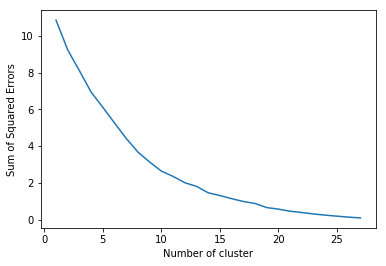

In [88]:
# find optimum number of clusters

copenhagen_grouped_clustering = copenhagen_grouped.drop('Borough', 1)

sse = {}

for k in range(1, 28):
# run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0).fit(copenhagen_grouped_clustering)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Squared Errors")
plt.show()
